In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('credit_score.csv', low_memory = False)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
df.shape

(100000, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df.Age.unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

#### Replacing white spaces in the whole dataset with empty spaces

In [9]:
df = df.replace(' ', '')

In [10]:
display(df.Month.unique())

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

#### Check for unique values

In [11]:
def unique_val():
    for i in df.columns:
        if df[i].dtype == 'object':
            print(f"{i}")
            display(df[i].unique())
            print('\n')

In [12]:
unique_val()

ID


array(['0x1602', '0x1603', '0x1604', ..., '0x25feb', '0x25fec', '0x25fed'],
      dtype=object)



Customer_ID


array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)



Month


array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)



Name


array(['Aaron Maashoh', nan, 'Rick Rothackerj', ..., 'Chris Wickhamm',
       'Sarah McBridec', 'Nicks'], dtype=object)



Age


array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)



SSN


array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)



Occupation


array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)



Annual_Income


array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)



Num_of_Loan


array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 



Type_of_Loan


array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)



Num_of_Delayed_Payment


array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4



Changed_Credit_Limit


array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)



Credit_Mix


array(['_', 'Good', 'Standard', 'Bad'], dtype=object)



Outstanding_Debt


array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)



Credit_History_Age


array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and



Payment_of_Min_Amount


array(['No', 'NM', 'Yes'], dtype=object)



Amount_invested_monthly


array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)



Payment_Behaviour


array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)



Monthly_Balance


array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., '516.8090832742814', '319.1649785257098', '393.6736955618808'],
      dtype=object)



Credit_Score


array(['Good', 'Standard', 'Poor'], dtype=object)

#### Replacing special charecters and changing to correct datatypes

In [13]:
df.Age = df.Age.str.replace('_', '')
df.Age = df.Age.astype('int')
df.Occupation  = df.Occupation.replace('_______', None)
df.Annual_Income = df.Annual_Income.str.replace('_','').astype('float').round(2)
df.Num_of_Loan = df.Num_of_Loan.str.replace('_','').astype('int')
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.str.replace('_','').astype('float')
df.Changed_Credit_Limit = df.Changed_Credit_Limit.str.replace('_','')
df.Changed_Credit_Limit = df.Changed_Credit_Limit.replace('', None)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.replace('_', None)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.astype('float')
df.Credit_Mix = df.Credit_Mix.replace('_', None)
#df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.str.replace('NM', 'Not Mentioned')
df.Amount_invested_monthly = df.Amount_invested_monthly.str.replace('_','')
df.Amount_invested_monthly = df.Amount_invested_monthly.astype('float').round(2)
df.Payment_Behaviour = df.Payment_Behaviour.replace('!@9#%8', None)
df.Monthly_Balance = df.Monthly_Balance.str.replace('_','')
df.Monthly_Balance = df.Monthly_Balance.astype('float').round(2)
df.Outstanding_Debt = df.Outstanding_Debt.str.replace('_', '').astype('float').round(2)

#### Rechecking the datatypes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

#### Dropping unwanted columns

In [15]:
df.drop(columns = ['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age'], inplace = True)

#### Checking for negitive values

In [16]:
def neg_val():
    for i in df.columns:
        if (df[i].dtype != 'object'):
            display(f"{i} \n{df[i][df[i] < 0].unique()}")
            print(f'Number of negitive values in {i} col: {len(df[i][df[i] < 0])} \n')            

In [17]:
neg_val()

'Age \n[-500]'

Number of negitive values in Age col: 886 



'Annual_Income \n[]'

Number of negitive values in Annual_Income col: 0 



'Monthly_Inhand_Salary \n[]'

Number of negitive values in Monthly_Inhand_Salary col: 0 



'Num_Bank_Accounts \n[-1]'

Number of negitive values in Num_Bank_Accounts col: 21 



'Num_Credit_Card \n[]'

Number of negitive values in Num_Credit_Card col: 0 



'Interest_Rate \n[]'

Number of negitive values in Interest_Rate col: 0 



'Num_of_Loan \n[-100]'

Number of negitive values in Num_of_Loan col: 3876 



'Delay_from_due_date \n[-1 -2 -3 -5 -4]'

Number of negitive values in Delay_from_due_date col: 591 



'Num_of_Delayed_Payment \n[-1. -3. -2.]'

Number of negitive values in Num_of_Delayed_Payment col: 644 



'Changed_Credit_Limit \n[-2.01 -1.01 -3.01 -1.24 -4.14 -0.14 -2.87 -2.46 -4.26 -1.26 -1.33 -1.49\n -0.31 -1.48 -1.06 -2.17 -1.1  -0.05 -5.48 -4.48 -1.28 -1.93 -1.94 -5.02\n -4.2  -0.04 -2.11 -3.37 -3.43 -0.43 -3.69 -2.69 -3.52 -1.01 -0.32 -3.58\n -0.05 -4.76 -1.76 -0.5  -1.8  -0.8  -3.5  -3.93 -5.78 -1.29 -0.29 -3.67\n -1.28 -1.21 -2.52 -0.52 -4.19 -0.74 -2.34 -0.34 -0.26 -1.65 -0.02 -1.16\n -2.16 -5.63 -2.37 -2.49 -0.08 -4.33 -6.48 -0.48 -0.7  -0.7  -1.64 -0.62\n -1.13 -2.13 -4.59 -2.35 -4.35 -3.34 -4.88 -0.59 -0.61 -1.83 -2.95 -0.95\n -1.95 -4.36 -1.61 -6.31 -5.31 -3.98 -0.24 -1.89 -3.36 -3.68 -2.31 -4.31\n -1.31 -1.52 -1.08 -4.15 -3.15 -4.98 -5.5  -2.55 -1.77 -0.66 -1.92 -3.05\n -1.35 -5.74 -2.74 -3.74 -0.6  -6.2  -4.03 -1.41 -5.41 -4.41 -2.93 -5.05\n -4.05 -0.44 -3.42 -1.4  -2.4  -2.67 -2.63 -1.39 -1.85 -3.11 -3.06 -0.2\n -1.59 -0.36 -1.55 -4.65 -4.77 -0.77 -4.75 -5.75 -2.59 -4.32 -2.05 -0.16\n -5.37 -1.99 -0.83 -3.13 -0.39 -0.89 -0.01 -0.32 -2.06 -2.91 -4.3  -3.12\n -2.7  -0.93 -2

Number of negitive values in Changed_Credit_Limit col: 1586 



'Num_Credit_Inquiries \n[]'

Number of negitive values in Num_Credit_Inquiries col: 0 



'Outstanding_Debt \n[]'

Number of negitive values in Outstanding_Debt col: 0 



'Credit_Utilization_Ratio \n[]'

Number of negitive values in Credit_Utilization_Ratio col: 0 



'Total_EMI_per_month \n[]'

Number of negitive values in Total_EMI_per_month col: 0 



'Amount_invested_monthly \n[]'

Number of negitive values in Amount_invested_monthly col: 0 



'Monthly_Balance \n[-3.33333333e+26]'

Number of negitive values in Monthly_Balance col: 9 



#### Check for null values

In [18]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

#### Data Cleaning

In [20]:
def box_plot(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtype != 'object':
            sns.boxplot(dataframe[i], orient = 'h').set_title(f'{i}', fontweight = 'bold')
            plt.show()

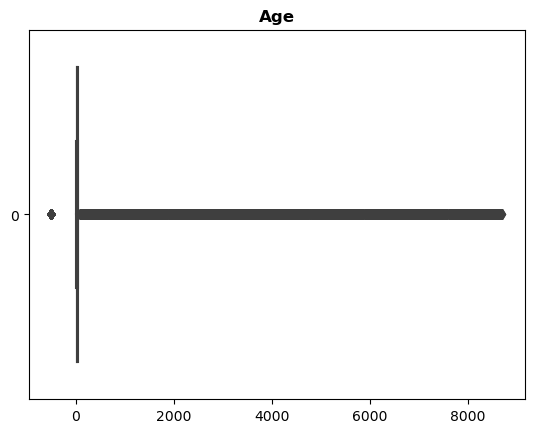

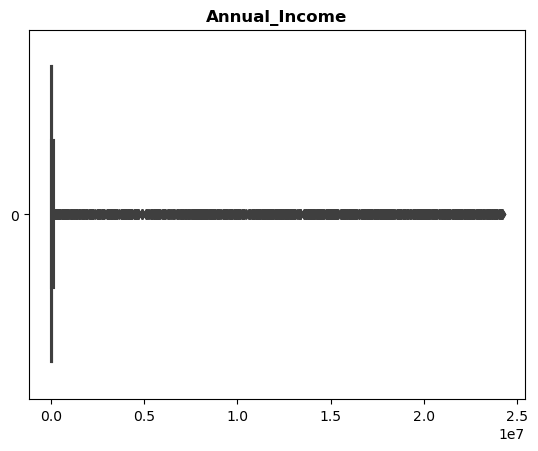

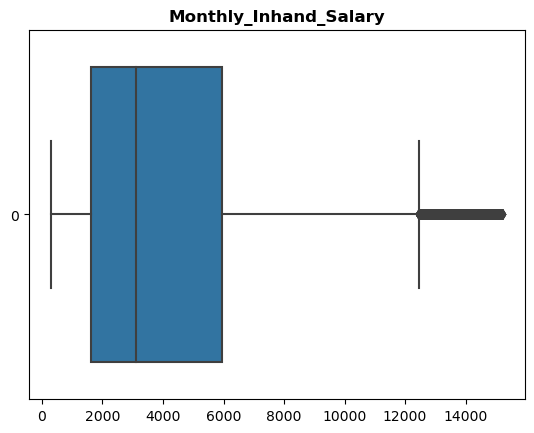

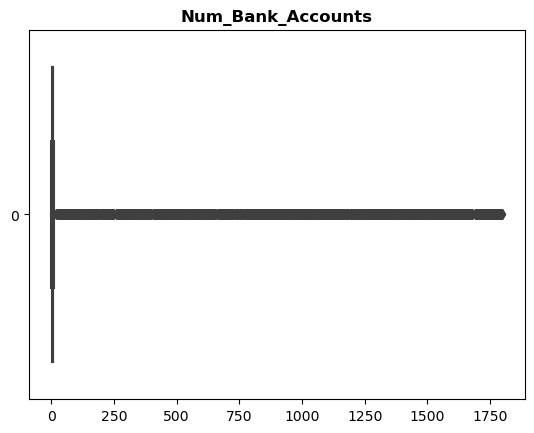

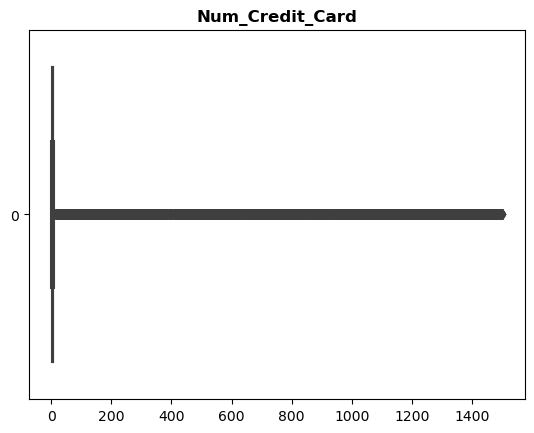

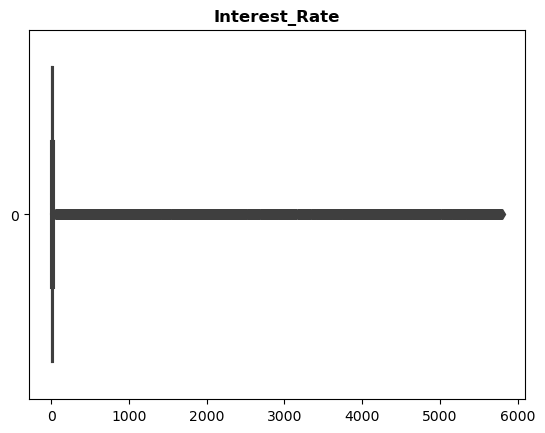

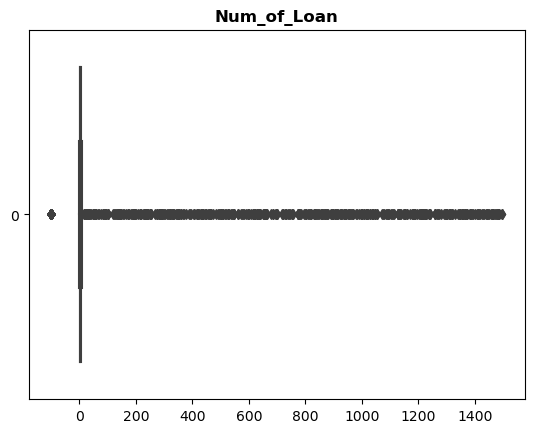

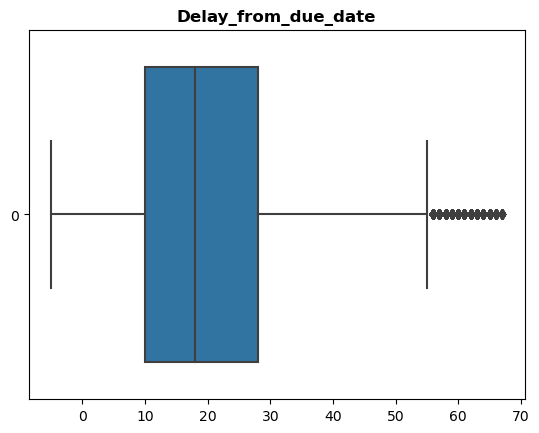

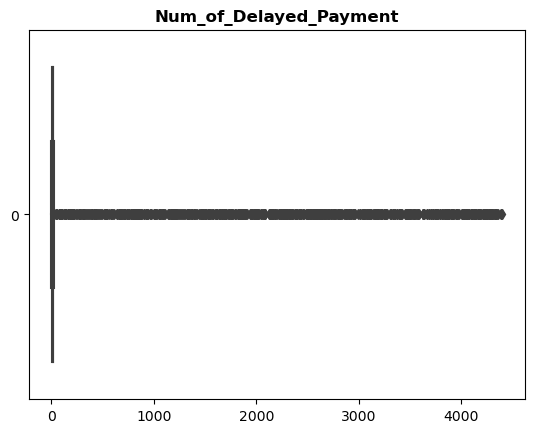

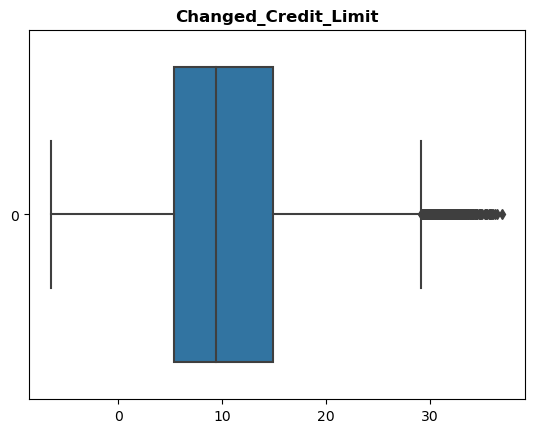

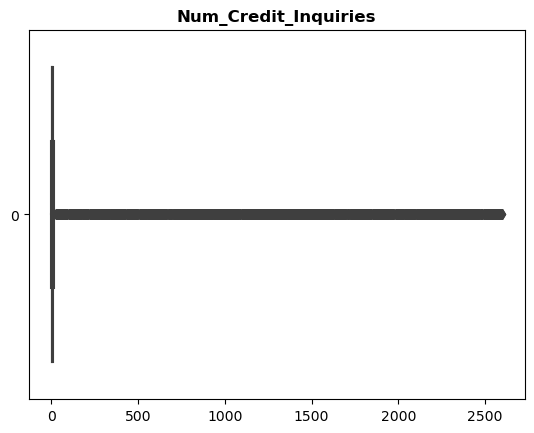

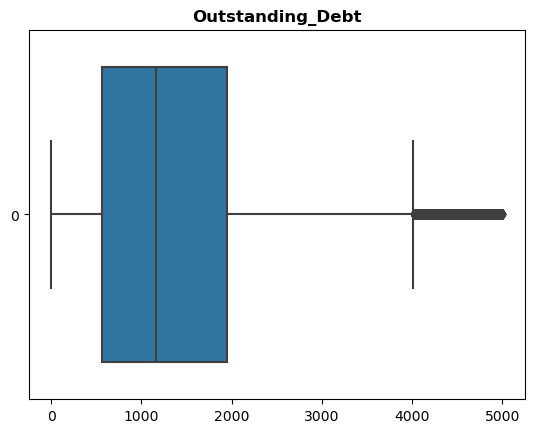

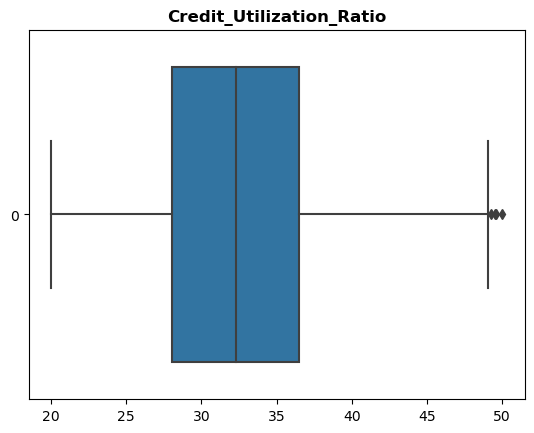

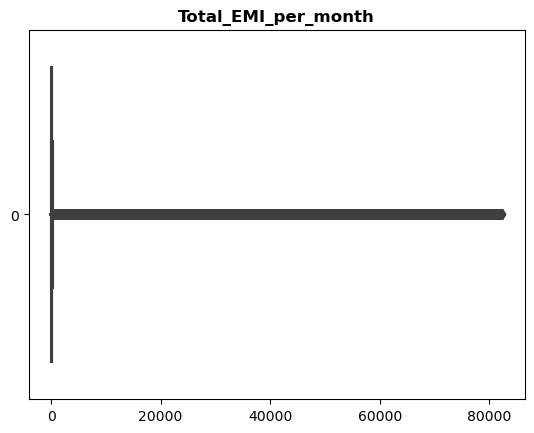

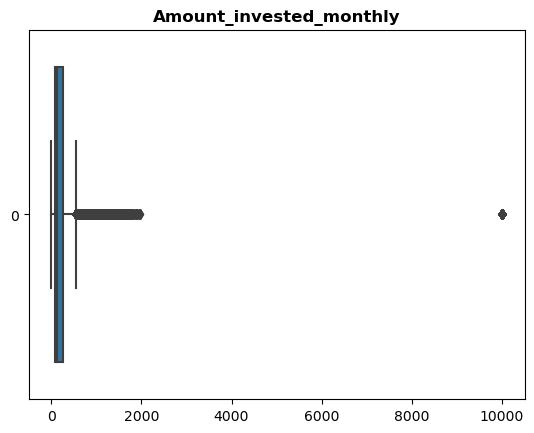

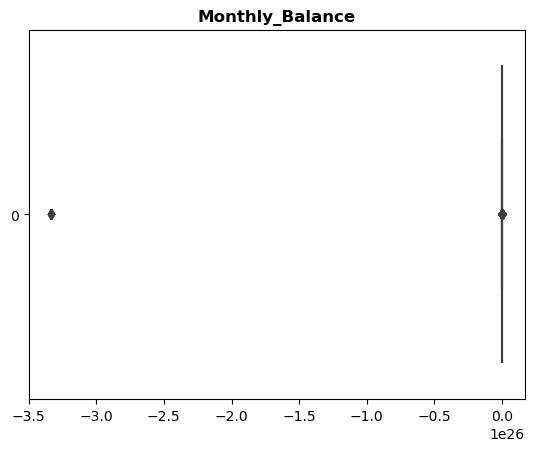

In [21]:
box_plot(df)

In [22]:
col = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 
       'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Amount_invested_monthly',]

In [23]:
# for i in col:
    
   
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)

#     iqr = q3 - q1

#     lower_fence = q1 - 1.5 * iqr
#     upper_fence = q3 + 1.5 * iqr

#     df = df[(df[col] >= lower_fence) & (df[col] <= upper_fence)]

#     box_plot()

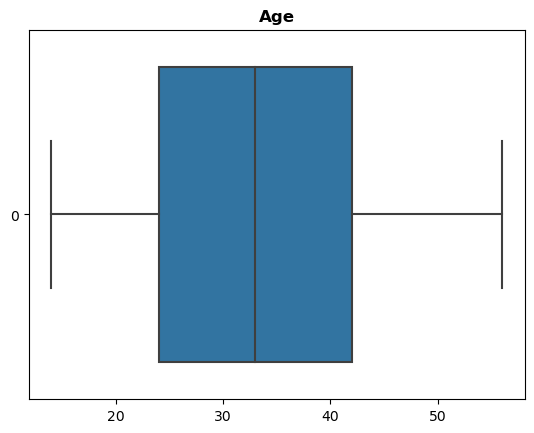

In [24]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
        
iqr = q3 - q1
        
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
        
df = df[(df.Age >= lower_fence) & (df.Age <= upper_fence)]
        
sns.boxplot(df.Age, orient='h').set_title('Age', fontweight = 'bold')
plt.show()

In [25]:
for i in df.columns:
    if df[i].dtype == 'object':
        
        df[i] = df[i].fillna(method = 'bfill')

#### Data Analysis

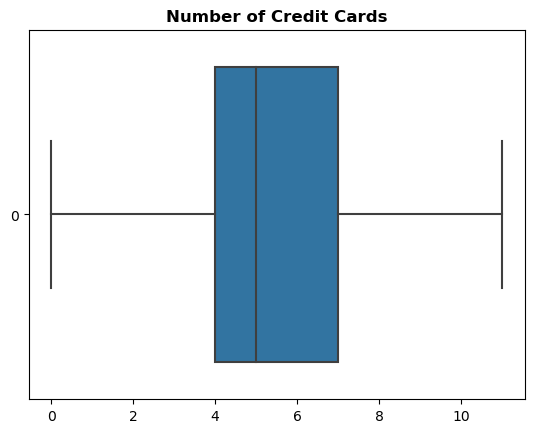

In [26]:
q1 = df.Num_Credit_Card.quantile(0.25)
q3 = df.Num_Credit_Card.quantile(0.75)

iqr = q3 - q1

lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

num_credit_card = df[(df.Num_Credit_Card >= lower_fence) & (df.Num_Credit_Card <= upper_fence)]

sns.boxplot(num_credit_card.Num_Credit_Card, orient = 'h').set_title('Number of Credit Cards', fontweight = 'bold')
plt.show()

Average number of credit cards: 33.3
Maximum number of credit cards: 11
Minimum number of credit cards: 0


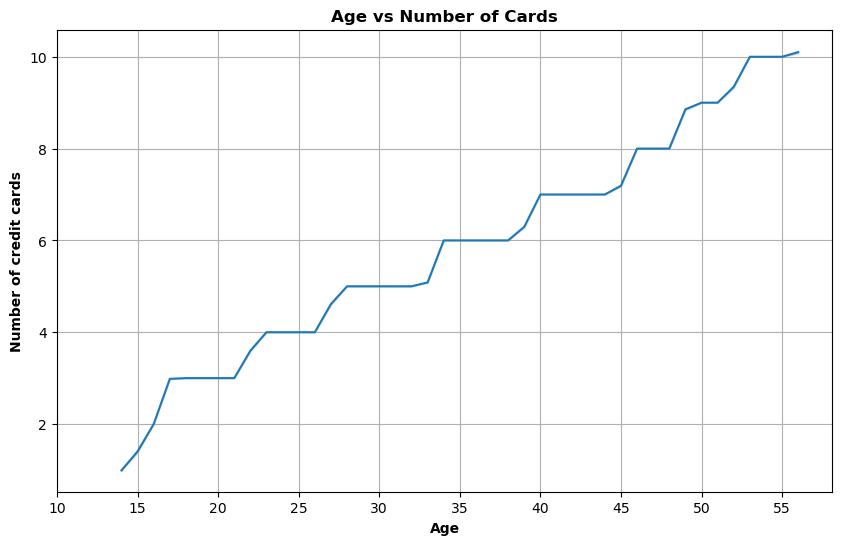

In [27]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = np.sort(num_credit_card.Age), y = np.sort(num_credit_card.Num_Credit_Card))
plt.title('Age vs Number of Cards', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.xticks(np.arange(10, 60, 5))
plt.ylabel('Number of credit cards', fontweight = 'bold')
plt.grid(True)
#plt.legend(df.Age.mean().round(1))
print(f'Average number of credit cards: {num_credit_card.Age.mean().round(1)}')
print(f'Maximum number of credit cards: {num_credit_card.Num_Credit_Card.max()}')
print(f'Minimum number of credit cards: {num_credit_card.Num_Credit_Card.min()}')
plt.show()

* The number of credit cards is increasing with age
* The least number of credit cards are aged of 14
* The highest number of credit cards are at the age of 56

In [28]:
occ_cards = num_credit_card[['Occupation', 'Num_Credit_Card']].groupby(['Occupation']).sum().sort_values(['Num_Credit_Card'], ascending=False)
occ_cards

,Num_Credit_Card
Occupation,
Lawyer,36857
Engineer,36161
Teacher,35878
Accountant,35782
Developer,35743
Media_Manager,35528
Scientist,35280
Entrepreneur,35247
Architect,35229


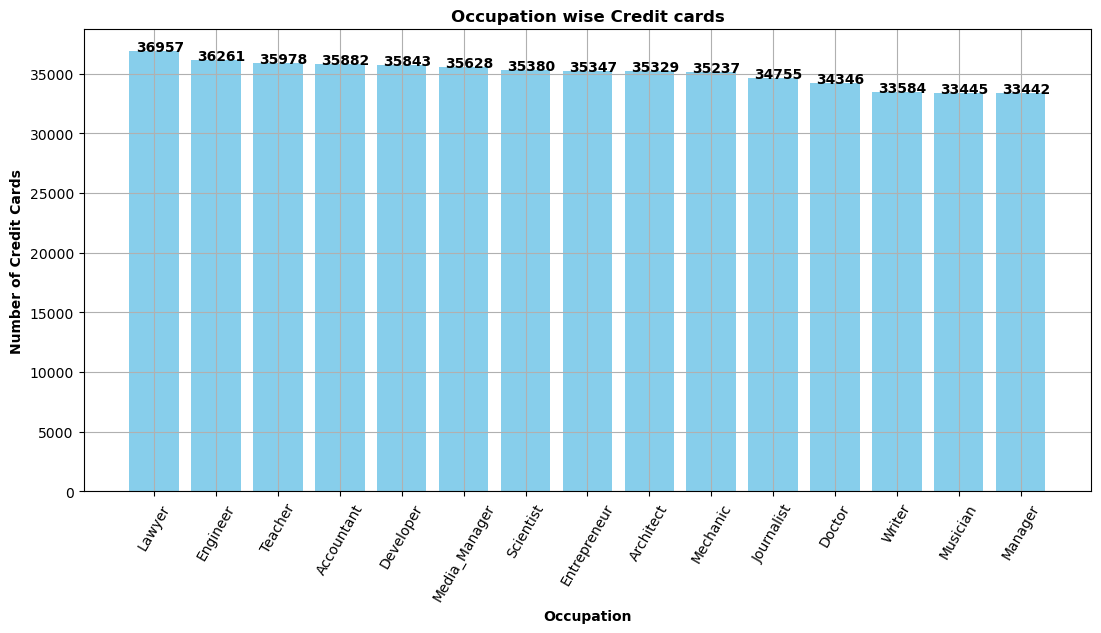

In [32]:
x = occ_cards.index.to_list()
y = occ_cards.Num_Credit_Card.values.tolist()

plt.figure(figsize = (13, 6))
plt.bar(x = x, height = y, color = 'skyblue')
plt.title('Occupation wise Credit cards', fontweight = 'bold')
plt.xlabel('Occupation', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Number of Credit Cards', fontweight = 'bold')
for i in range(len(x)):
    plt.text(i-0.3, y[i], y[i]+100, fontweight = 'bold')
plt.grid(True)

In [33]:
# plt.figure(figsize = (10,6))

# x = occ_cards.index.to_list()
# y = occ_cards.Num_Credit_Card.values.tolist()

# fig = sns.barplot(x = x, y = y)

# plt.xlabel('Occupation', fontweight = 'bold')
# plt.ylabel('Number of credit cards', fontweight = 'bold')
# plt.title ('Occupation wise Credit cards', fontweight = 'bold')
# plt.xticks(rotation = 60)

# for p in fig.patches:
#     height = p.get_height()
    
#     fig.text(x = p.get_x() + (p.get_width()/2), y = height + 100, s = '{:.0f}'.format(height), ha = 'center')
    
# plt.show()

* Lawers have the most Credit cards, followed by Engineers, Teachers, Accountants, and developers as top 5.
* Managers have the least number of credit cards

In [36]:
num_credit_card[['Occupation', 'Num_Credit_Card', 'Credit_Score']][num_credit_card.Credit_Score == 'Good'].groupby(['Credit_Score', 'Occupation']).sum().sort_values(['Num_Credit_Card'], ascending=False)

Num_Credit_Card
Credit_Score Occupation                    
Good         Media_Manager             5039
             Lawyer                    5010
             Engineer                  4986
             Journalist                4981
             Teacher                   4946
             Developer                 4866
             Entrepreneur              4784
             Architect                 4756
             Scientist                 4745
             Musician                  4668
             Accountant                4657
             Doctor                    4509
             Manager                   4404
             Mechanic                  4167
             Writer                    3583

* Media_Managers are having highest Credit Score followed by Lawyer, Engineer, Journalist

In [37]:
num_credit_card[['Occupation', 'Num_Credit_Card', 'Credit_Score']][num_credit_card.Credit_Score == 'Poor'].groupby(['Credit_Score', 'Occupation']).sum().sort_values(['Num_Credit_Card'], ascending=False)

Num_Credit_Card
Credit_Score Occupation                    
Poor         Accountant               13119
             Engineer                 13067
             Scientist                13026
             Teacher                  12934
             Mechanic                 12717
             Entrepreneur             12583
             Developer                12330
             Lawyer                   12206
             Writer                   11769
             Journalist               11752
             Manager                  11546
             Architect                11488
             Media_Manager            11457
             Musician                 11356
             Doctor                   11186

* Accountants have having poorest Credit Score followed by Engineers, Scientists, Teachers and Mechanics

In [39]:
# z1 = num_credit_card[['Occupation', 'Outstanding_Debt']].groupby(['Occupation']).sum().sort_values(['Outstanding_Debt'], ascending=False)
# z2 = num_credit_card[['Occupation', 'Num_of_Loan']].groupby(['Occupation']).sum().sort_values(['Num_of_Loan'], ascending=False)
# z3 = num_credit_card[['Occupation', 'Num_of_Delayed_Payment']].groupby(['Occupation']).sum().sort_values(['Num_of_Delayed_Payment'], ascending=False)
# z4 = num_credit_card[['Month', 'Num_of_Delayed_Payment']].groupby(['Month']).sum().sort_values(['Num_of_Delayed_Payment'], ascending=False)


# fig, ax = plt.subplots(2,2, figsize = (16,16))


# ax.flat[0].plot(z1, marker = 'o')
# # plt.scatter(z)
# ax[0,0].set_title('Occupation wise Outstanding Debt', fontweight = 'bold')
# ax[0,0].set_xlabel('Occupation', fontweight = 'bold')
# ax[0,0].set_xticklabels(z1.index.to_list(), rotation = 60)
# ax[0,0].set_ylabel('Outstanding Debt', fontweight = 'bold')

# # for index in range(len(num_credit_card.Occupation)):
# #     plt.text(z1.index.to_list()[index], z1.Outstanding_Debt.values.tolist()[index],
# #              z1.Outstanding_Debt.values.tolist()[index], size = 10)

# # for index, value in range(len(z1.Outstanding_Debt.values.tolist())):
# #     plt.text(index, value, str(value), fontweight = bold)
# ax.flat[0].set_facecolor('white')
# ax[0,0].grid(color = 'black')


# ax.flat[1].plot(z2, marker = 'v', color = 'black')
# ax[0,1].set_title('Occupation wise Loan amount', fontweight = 'bold')
# ax[0,1].set_xlabel('Occupation', fontweight = 'bold')
# ax[0,1].set_xticklabels(z2.index.to_list(),rotation = 60)
# ax[0,1].set_ylabel('Loan amount', fontweight = 'bold')
# ax.flat[1].set_facecolor('white')
# ax[0,1].grid(True)


# ax.flat[2].plot(z3, marker = '^', color = 'orange')
# ax[1,0].set_title('Occupation wise Delayed payments', fontweight = 'bold')
# ax[1,0].set_xlabel('Occupation', fontweight = 'bold')
# ax[1,0].set_xticklabels(z3.index.to_list(),rotation = 60)
# ax[1,0].set_ylabel('Number of Delayed Payments', fontweight = 'bold')
# ax.flat[2].set_facecolor('white')
# ax[1,0].grid(True)


# ax.flat[3].plot(z4, marker = 's', color = 'red')
# ax[1,1].set_title('Month wise Delayed payments', fontweight = 'bold')
# ax[1,1].set_xlabel('Month', fontweight = 'bold')
# ax[1,1].set_xticklabels(z4.index.to_list(),rotation = 60)
# ax[1,1].set_ylabel('Number of Delayed Payments', fontweight = 'bold')
# ax.flat[3].set_facecolor('white')
# ax.flat[3].grid(True)



# plt.tight_layout()
# plt.show()

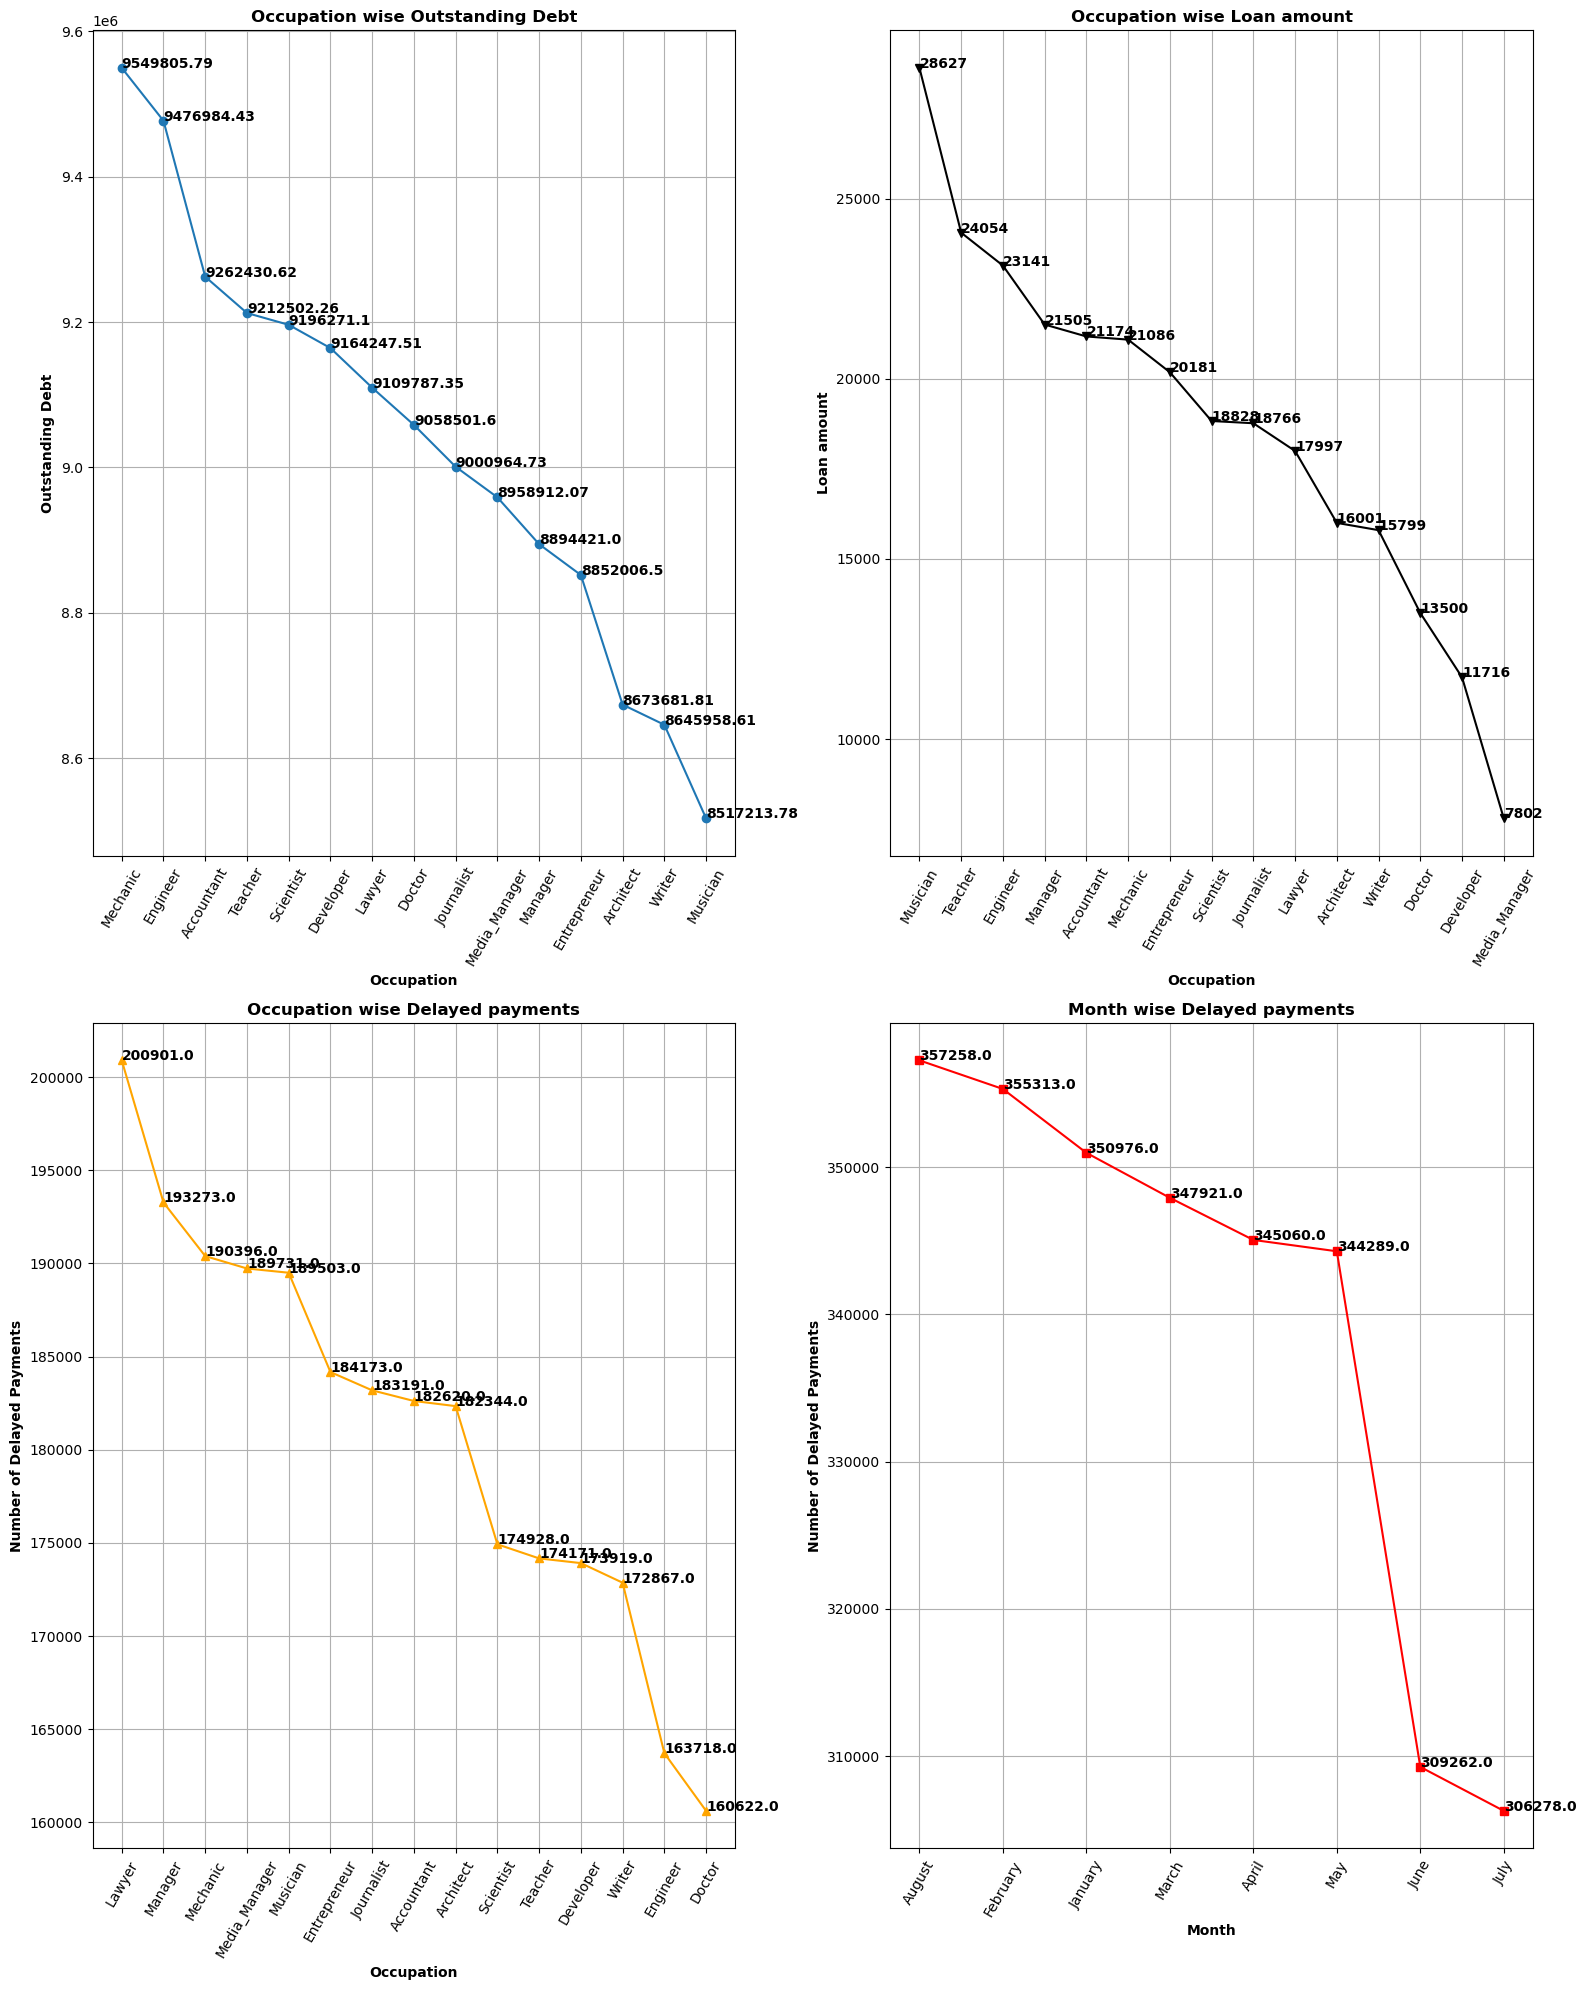

In [69]:
z1 = num_credit_card[['Occupation', 'Outstanding_Debt']].groupby(['Occupation']).sum().sort_values(['Outstanding_Debt'], ascending=False)
z2 = num_credit_card[['Occupation', 'Num_of_Loan']].groupby(['Occupation']).sum().sort_values(['Num_of_Loan'], ascending=False)
z3 = num_credit_card[['Occupation', 'Num_of_Delayed_Payment']].groupby(['Occupation']).sum().sort_values(['Num_of_Delayed_Payment'], ascending=False)
z4 = num_credit_card[['Month', 'Num_of_Delayed_Payment']].groupby(['Month']).sum().sort_values(['Num_of_Delayed_Payment'], ascending=False)

x1, y1 = z1.index.to_list(), z1.Outstanding_Debt.values.tolist()
x2, y2 = z2.index.to_list(), z2.Num_of_Loan.values.tolist()
x3, y3 = z3.index.to_list(), z3.Num_of_Delayed_Payment.values.tolist()
x4, y4 = z4.index.to_list(), z4.Num_of_Delayed_Payment.values.tolist()

plt.figure(figsize = (16, 20))
ax = plt.axes()

plt.subplot(221)
plt.plot(x1, y1, marker = 'o')
# plt.scatter(z)
plt.title('Occupation wise Outstanding Debt', fontweight = 'bold')
plt.xlabel('Occupation', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Outstanding Debt', fontweight = 'bold')

for index in range(len(x1)):
    plt.text(x1[index], y1[index], y1[index], fontweight = 'bold')

plt.grid()

plt.subplot(222)
plt.plot(x2, y2, marker = 'v', color = 'black')
plt.title('Occupation wise Loan amount', fontweight = 'bold')
plt.xlabel('Occupation', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Loan amount', fontweight = 'bold')

for index in range(len(x2)):
    plt.text(x2[index], y2[index], y2[index], fontweight = 'bold')

plt.grid()

plt.subplot(223)
plt.plot(x3, y3, marker = '^', color = 'orange')
plt.title('Occupation wise Delayed payments', fontweight = 'bold')
plt.xlabel('Occupation', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Number of Delayed Payments', fontweight = 'bold')

for index in range(len(x3)):
    plt.text(x3[index], y3[index], y3[index], fontweight = 'bold')
    
plt.grid()

plt.subplot(224)
plt.plot(x4, y4, marker = 's', color = 'red')
plt.title('Month wise Delayed payments', fontweight = 'bold')
plt.xlabel('Month', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Number of Delayed Payments', fontweight = 'bold')

for index in range(len(x4)):
    plt.text(x4[index], y4[index], y4[index], fontweight = 'bold')

plt.grid()

plt.tight_layout()
plt.show()

* Mechanics are having highest Outstanding debt followed by Engineers, Accountants, Teachers and Scientists.
* Musicians have having lowest Outstanding Debt.
* Musicians are having hightest Loan amount followed by Teachers, Engineer, Manager, Accountant.
* Media managers are having least amount of Loan amount.
* Lawyers are highest in delayed payments followed by Managers, Mechanics, Media Managers and Musicians.
* Doctors are the least in delayed payments.
* Most payments are being delayed in August followed by February and January.
* The last payment delay is in July.

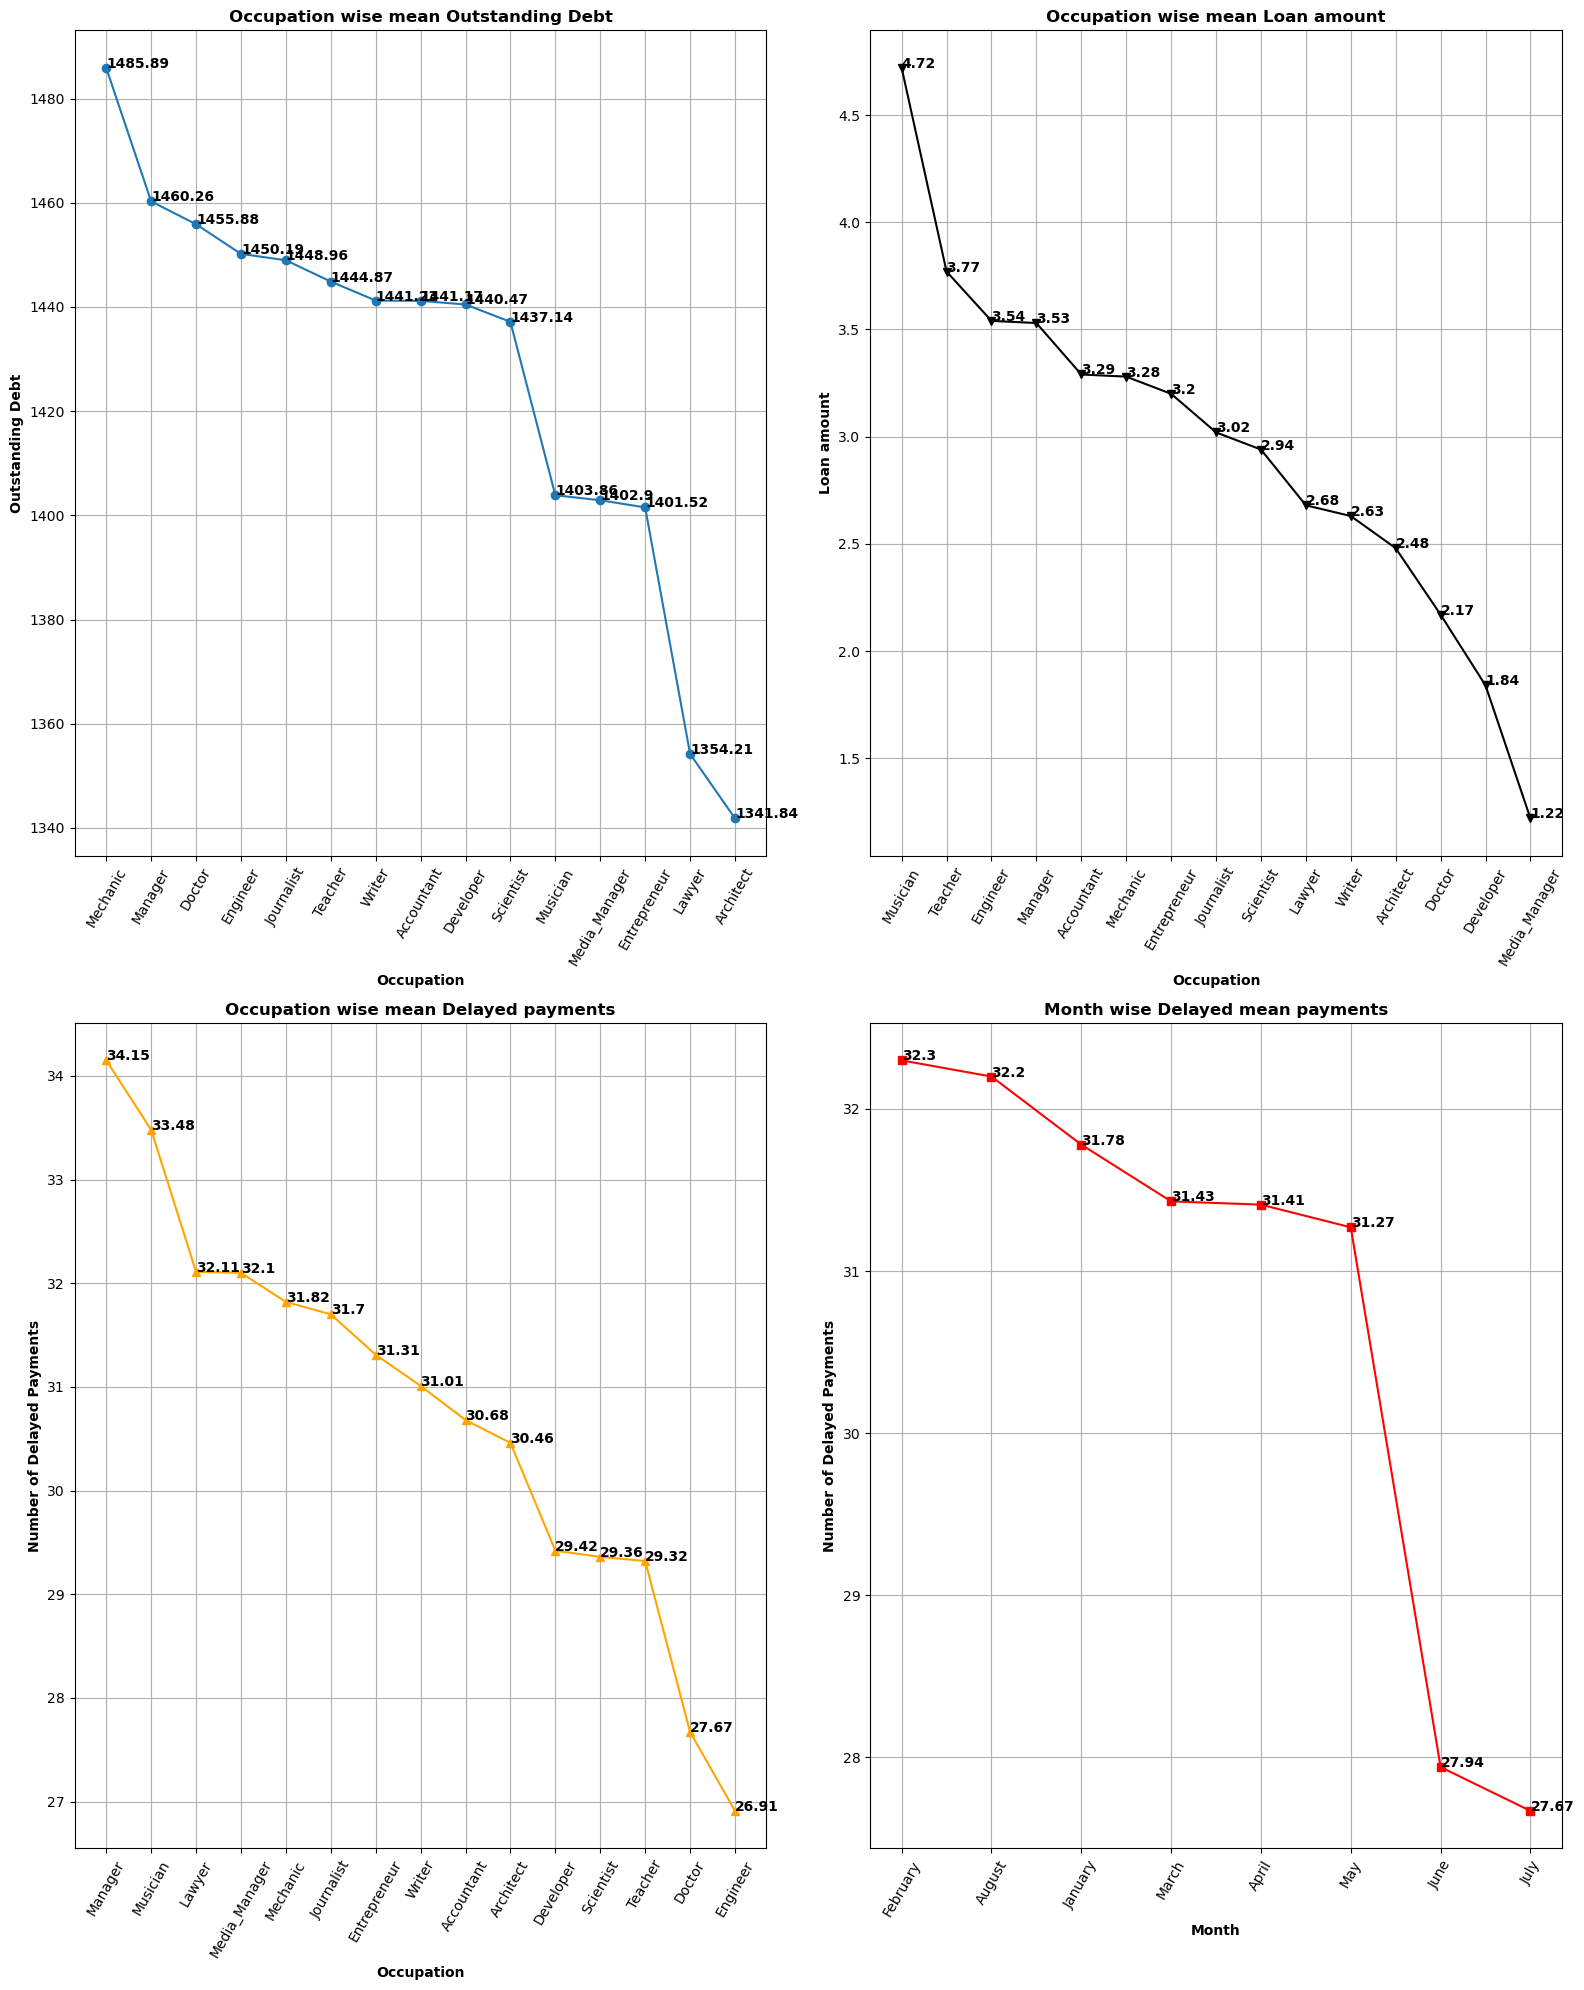

In [72]:
z1 = num_credit_card[['Occupation', 'Outstanding_Debt']].groupby(['Occupation']).mean().round(2).sort_values(['Outstanding_Debt'], ascending=False)
z2 = num_credit_card[['Occupation', 'Num_of_Loan']].groupby(['Occupation']).mean().round(2).sort_values(['Num_of_Loan'], ascending=False)
z3 = num_credit_card[['Occupation', 'Num_of_Delayed_Payment']].groupby(['Occupation']).mean().round(2).sort_values(['Num_of_Delayed_Payment'], ascending=False)
z4 = num_credit_card[['Month', 'Num_of_Delayed_Payment']].groupby(['Month']).mean().round(2).sort_values(['Num_of_Delayed_Payment'], ascending=False)

x1, y1 = z1.index.to_list(), z1.Outstanding_Debt.values.tolist()
x2, y2 = z2.index.to_list(), z2.Num_of_Loan.values.tolist()
x3, y3 = z3.index.to_list(), z3.Num_of_Delayed_Payment.values.tolist()
x4, y4 = z4.index.to_list(), z4.Num_of_Delayed_Payment.values.tolist()

plt.figure(figsize = (16, 20))

plt.subplot(221)
plt.plot(z1, marker = 'o')
# plt.scatter(z)
plt.title('Occupation wise mean Outstanding Debt', fontweight = 'bold')
plt.xlabel('Occupation', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Outstanding Debt', fontweight = 'bold')

for index in range(len(x1)):
    plt.text(x1[index], y1[index], y1[index], fontweight = 'bold')

plt.grid()

plt.subplot(222)
plt.plot(z2, marker = 'v', color = 'black')
plt.title('Occupation wise mean Loan amount', fontweight = 'bold')
plt.xlabel('Occupation', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Loan amount', fontweight = 'bold')

for index in range(len(x2)):
    plt.text(x2[index], y2[index], y2[index], fontweight = 'bold')

plt.grid()

plt.subplot(223)
plt.plot(z3, marker = '^', color = 'orange')
plt.title('Occupation wise mean Delayed payments', fontweight = 'bold')
plt.xlabel('Occupation', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Number of Delayed Payments', fontweight = 'bold')

for index in range(len(x3)):
    plt.text(x3[index], y3[index], y3[index], fontweight = 'bold')

plt.grid()

plt.subplot(224)
plt.plot(z4, marker = 's', color = 'red')
plt.title('Month wise Delayed mean payments', fontweight = 'bold')
plt.xlabel('Month', fontweight = 'bold')
plt.xticks(rotation = 60)
plt.ylabel('Number of Delayed Payments', fontweight = 'bold')

for index in range(len(x4)):
    plt.text(x4[index], y4[index], y4[index], fontweight = 'bold')

plt.grid()

plt.tight_layout()
plt.show()

* On average Mechanics have the highest amount of outstanding debt followed by managers, doctors, Engineers and Journalists.
* While architects have to have the least average Outstanding debts.
* On average Musicians are taking loan amounts followed by Teachers, Engineers, managers and accountants.
* While Media managers are taking the least Loan on average.
* On average Managers are making the highest delayed payments followed by Musicians, Lawyers, Media managers and Mechanics.
* While Engineers are making the least delayed payments on average.
* On average most payments are being delayed in February followed by August, January, March and April.
* Least payment delays are in July month on average.

#### One hot encoding

In [34]:
def classification_col():
    
    for i in num_credit_card.columns:
        
        if num_credit_card[i].dtype == 'object':
            
            print(f"{i} \n {num_credit_card[i].unique()} \n")

In [35]:
classification_col()

Month 
 ['January' 'February' 'April' 'May' 'June' 'July' 'August' 'March'] 

Occupation 
 ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect'] 

Credit_Mix 
 ['Good' 'Standard' 'Bad'] 

Payment_of_Min_Amount 
 ['No' 'NM' 'Yes'] 

Payment_Behaviour 
 ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Small_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Large_value_payments' 'Low_spent_Medium_value_payments' None] 

Credit_Score 
 ['Good' 'Standard' 'Poor'] 



In [36]:
num_credit_card.Credit_Mix = df.Credit_Mix.replace(['Good','Standard','Bad'], [1,2,0])
num_credit_card.Payment_of_Min_Amount = df.Payment_of_Min_Amount.replace(['No','NM','Yes'], [0,2,1])
num_credit_card.Credit_Score = df.Credit_Score.replace(['Good','Standard','Poor'], [1, 2, 0])

In [37]:
credit_labels = print(f"Bad/Poor/No - 0 \nGood/Yes - 1 \nStandard/NM - 2")
credit_labels

Bad/Poor/No - 0 
Good/Yes - 1 
Standard/NM - 2


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

num_credit_card.Month = le.fit_transform(num_credit_card.Month)
num_credit_card.Occupation = le.fit_transform(num_credit_card.Occupation)
num_credit_card.Payment_Behaviour = le.fit_transform(num_credit_card.Payment_Behaviour)

In [39]:
num_credit_card = num_credit_card.fillna(method = 'bfill')

In [40]:
num_credit_card.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [41]:
nc = num_credit_card.copy()

#### Feature Selection

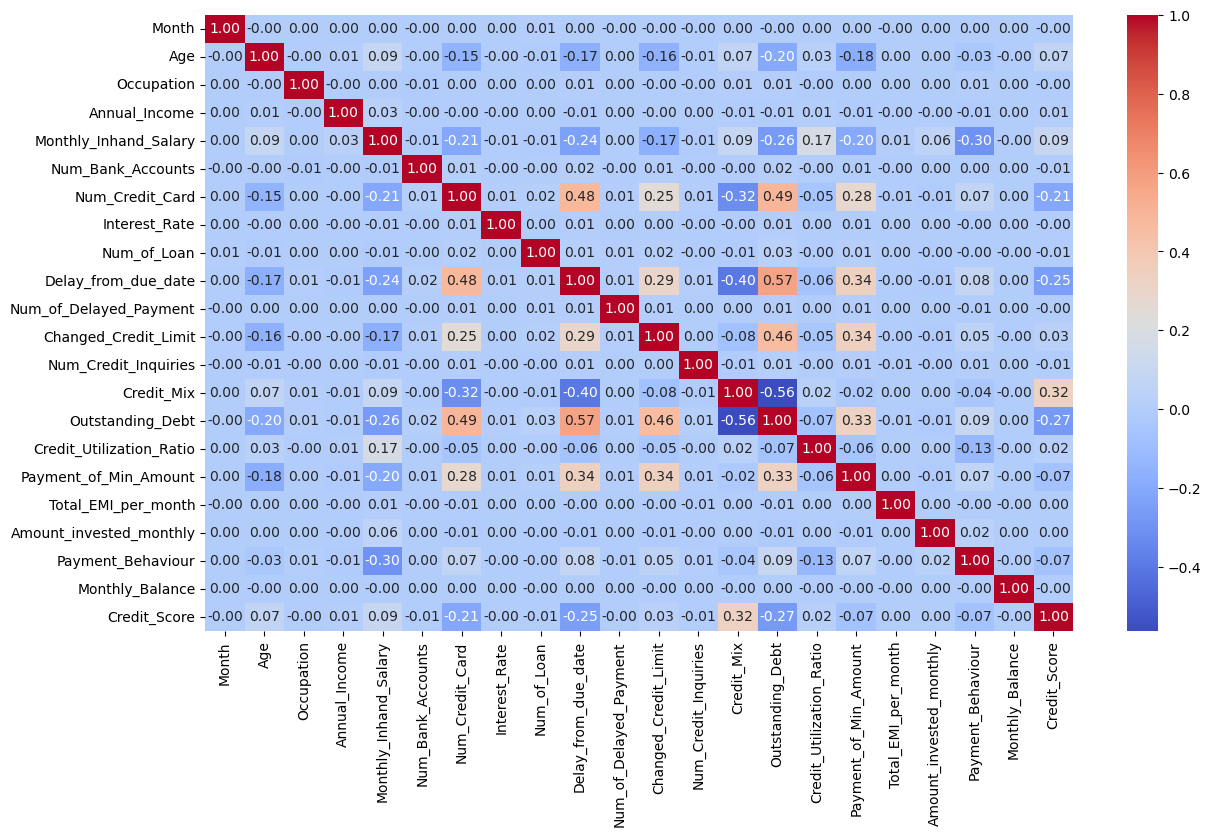

In [42]:
plt.figure(figsize = (14, 8))
sns.heatmap(nc.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

for i in nc.columns:
    if (nc[i].dtype != 'object') & (i != 'Credit_Score'):
        col_list.append(i)

In [44]:
x = nc[col_list]

vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,features,VIF
0,Month,0.299566
1,Age,0.094610
2,Occupation,0.277639
3,Annual_Income,0.984991
4,Monthly_Inhand_Salary,0.365198
5,Num_Bank_Accounts,0.979233
6,Num_Credit_Card,0.122348
7,Interest_Rate,0.976366
8,Num_of_Loan,0.997757
9,Delay_from_due_date,0.331889


**Since all the features are less than 5, all of them are considerable.**

#### Model Building

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [46]:
x = nc.drop(columns = ['Credit_Score'], axis = 1)
y = nc.Credit_Score

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle = True)

In [48]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Logistic Regression

In [49]:
log_res = LogisticRegression()

log_res.fit(x_train, y_train)

LogisticRegression()

In [50]:
log_predict = log_res.predict(x_test)

In [77]:
print(f"Logistric Regression Accuracy score is: {round(accuracy_score(y_test, log_predict) * 100, 2)}")

Logistric Regression Accuracy score is: 62.97


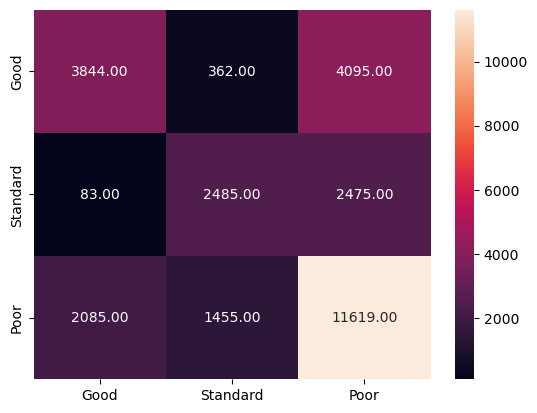

In [61]:
confuse_label = df.Credit_Score.unique().tolist()

cm = confusion_matrix(y_test, log_predict)

sns.heatmap(cm, annot = True, xticklabels = confuse_label, yticklabels = confuse_label, fmt = '.2f')

plt.show()

In [63]:
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.64      0.46      0.54      8301
           1       0.58      0.49      0.53      5043
           2       0.64      0.77      0.70     15159

    accuracy                           0.63     28503
   macro avg       0.62      0.57      0.59     28503
weighted avg       0.63      0.63      0.62     28503



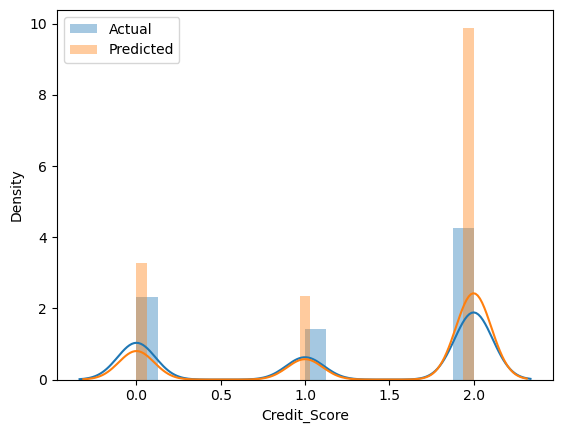

In [67]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(log_predict, label = 'Predicted')
plt.legend()
plt.show()

#### Decision Tree Classifier

In [68]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
dtc_predict = dtc.predict(x_test)

In [76]:
print(f"Decision Tree Classifier Accuracy Score: {round(accuracy_score(y_test, dtc_predict) * 100, 2)}")

Decision Tree Classifier Accuracy Score: 66.62


**Hyperparameter tuning of decision tree classifier**

In [71]:
parameters = {'max_features':['log2', 'sqrt', 'auto'],
              'criterion':['entropy', 'gini'],
              'max_depth':[2, 3, 5, 10, 50],
              'min_samples_split':[2, 3, 50, 100],
              'min_samples_leaf':[1, 5, 8, 10]}

In [73]:
grid_obj = GridSearchCV(dtc, parameters)

grid_obj = grid_obj.fit(x_train, y_train)

dtc = grid_obj.best_estimator_

dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=50)

In [74]:
dtc_predict = dtc.predict(x_test)

In [75]:
print(f"Decision Tree accuracy Score: {round(accuracy_score(y_test, dtc_predict) * 100, 2)}")

Decision Tree accuracy Score: 66.62


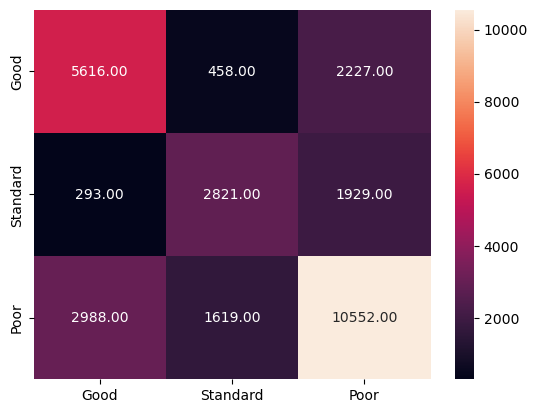

In [78]:
cm = confusion_matrix(y_test, dtc_predict)

sns.heatmap(cm, annot = True, xticklabels = confuse_label, yticklabels = confuse_label, fmt = '.2f')

plt.show()

In [80]:
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      8301
           1       0.58      0.56      0.57      5043
           2       0.72      0.70      0.71     15159

    accuracy                           0.67     28503
   macro avg       0.64      0.64      0.64     28503
weighted avg       0.67      0.67      0.67     28503



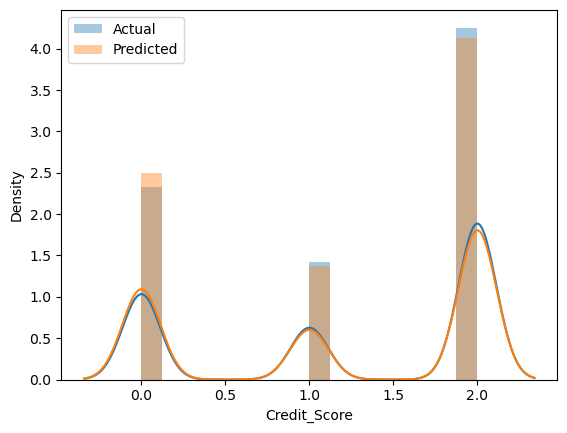

In [81]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(dtc_predict, label = 'Predicted')
plt.legend()
plt.show()

#### Random Forest Classifier

In [82]:
rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [83]:
rfc_predict = rfc.predict(x_test)

In [84]:
print(f"Random Forest Accuracy Score: {round(accuracy_score(y_test, rfc_predict) * 100, 2)}")

Random Forest Accuracy Score: 77.36


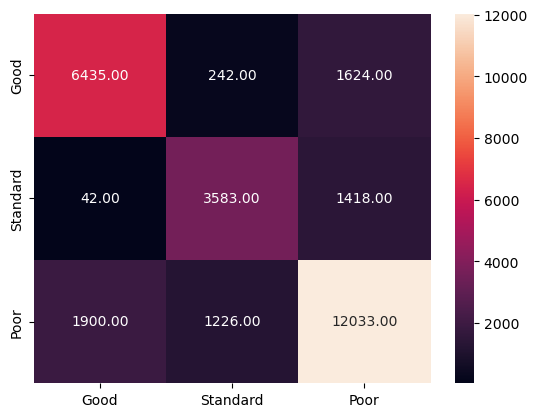

In [86]:
cm = confusion_matrix(y_test, rfc_predict)

sns.heatmap(cm, annot = True, xticklabels = confuse_label, yticklabels = confuse_label, fmt = '.2f')

plt.show()

In [87]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      8301
           1       0.71      0.71      0.71      5043
           2       0.80      0.79      0.80     15159

    accuracy                           0.77     28503
   macro avg       0.76      0.76      0.76     28503
weighted avg       0.77      0.77      0.77     28503



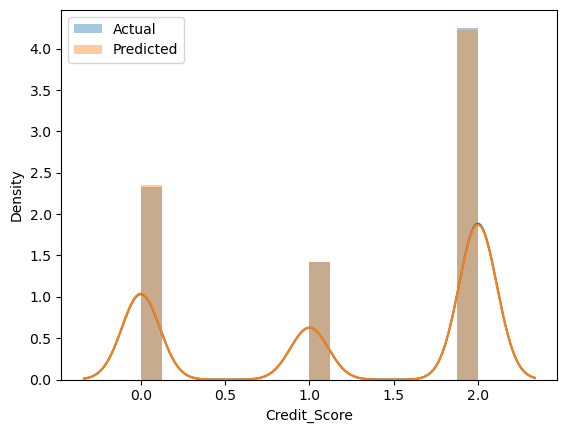

In [88]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(rfc_predict, label = 'Predicted')
plt.legend()
plt.show()